In [1]:
%%capture
%run ./algorithm/read_data.ipynb

### Random Forest Regressor

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [3]:
randomForestRegressor = RandomForestRegressor(n_estimators=300,random_state=40,n_jobs=-1)

In [4]:
rfr_model = randomForestRegressor.fit(X_train, y_train)

In [5]:
pred = rfr_model.predict(X_test)
result = pd.DataFrame({'pred_price': pred.astype(np.float64)})

In [6]:
pred_price = result
test_price = pd.DataFrame({'Test data price': y_test})
pred_test_price = pred_price.assign(test_price=test_price)
pred_test_price

,pred_price,test_price
0,20280.696667,21495.0
1,24523.250000,23798.0
2,14362.870000,16795.0
3,23038.546556,23741.0
4,8591.723333,8799.0
...,...,...
3513,7108.903333,7990.0
3514,11641.140000,11995.0
3515,27127.200000,26995.0
3516,20910.326667,19990.0


<Figure size 432x288 with 0 Axes>

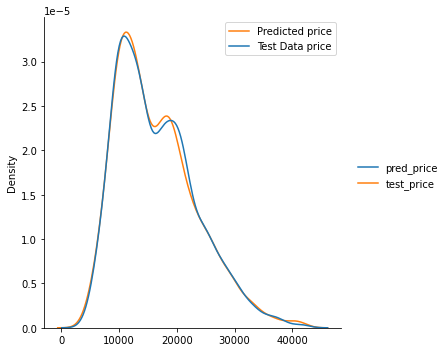

In [7]:
plt.figure()
# pred_test_price.plot(kind='kde')
sns.displot(data=pred_test_price,kind='kde')
plt.legend((u'Predicted price', u'Test Data price'))
plt.show()

In [8]:
rfr_model.score(X_train, y_train)

0.993066488673639

In [9]:
rfr_model.score(X_test, y_test)

0.9563078941099826